# Feature Engineering and Data Modelling

## Import Packages

In [1]:
!pip3 install imblearn

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

In [3]:
# remove warning
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Shows plot in notebook
sns.set(color_codes=True)

## Load Datasets

In [5]:
data = pd.read_csv('churn_data_modeling.csv')
churn_df = pd.DataFrame(data)
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14605 entries, 0 to 14604
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      14605 non-null  int64  
 1   id                              14605 non-null  object 
 2   channel_sales                   14605 non-null  object 
 3   cons_12m                        14605 non-null  int64  
 4   cons_gas_12m                    14605 non-null  int64  
 5   cons_last_month                 14605 non-null  int64  
 6   date_activ                      14605 non-null  object 
 7   date_end                        14605 non-null  object 
 8   date_modif_prod                 14605 non-null  object 
 9   date_renewal                    14605 non-null  object 
 10  forecast_cons_12m               14605 non-null  float64
 11  forecast_cons_year              14605 non-null  int64  
 12  forecast_discount_energy        

In [6]:
dates = churn_df[['date_end', 'date_activ', 'date_modif_prod', 'date_renewal']]
for date in dates:
    churn_df[date] = pd.to_datetime(churn_df[date], format = '%Y-%m-%d')
churn_df.drop(churn_df.columns[0], axis=1, inplace=True)
churn_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_off_peak,mean_year_price_peak,mean_year_price_med_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.148586,0.000000,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555,40.848791,24.539003,16.365274,0


In [7]:
churn_df.shape

(14605, 53)

## Feature Engineering

### Difference between off-peak price in december and preceding january

Your colleague has done some work on engineering the features within the cleaned dataset and has calculated a feature which seems to have predictive power.

In [8]:
price_df = pd.read_csv('price_data.csv')
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [9]:
price_df['price_date'] = pd.to_datetime(price_df['price_date'], format = '%Y-%m-%d')
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [10]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


In [11]:
churn_df = pd.merge(churn_df, diff, on = 'id')
churn_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_off_peak,mean_year_price_peak,mean_year_price_med_peak,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.036909,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687,1,0.020057,3.700961
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0,-0.003767,0.177779
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,0,-0.004670,0.177779
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,0,-0.004547,0.177779
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.073719,40.728885,24.437330,16.291555,40.848791,24.539003,16.365274,0,-0.006192,0.162916


Average price changes as time passes
By computing the average price changes over certain time periods rather than the entire year, we can now improve the feature that our colleague created

In [12]:
# Aggregate average prices per period by company
mean_prices = price_df.groupby(['id']).agg({'price_off_peak_var': 'mean', 'price_peak_var': 'mean', 
                                              'price_mid_peak_var': 'mean', 'price_off_peak_fix': 'mean', 
                                              'price_peak_fix': 'mean', 'price_mid_peak_fix': 'mean'}).reset_index()

In [13]:
# Calculate the mean difference between consecutive periods
mean_prices['off_peak_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_peak_var']
mean_prices['peak_mid_peak_var_mean_diff'] = mean_prices['price_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_mid_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_peak_fix']
mean_prices['peak_mid_peak_fix_mean_diff'] = mean_prices['price_peak_fix'] - mean_prices['price_mid_peak_fix']
mean_prices['off_peak_mid_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_mid_peak_fix']

In [14]:
columns = [
    'id', 
    'off_peak_peak_var_mean_diff',
    'peak_mid_peak_var_mean_diff', 
    'off_peak_mid_peak_var_mean_diff',
    'off_peak_peak_fix_mean_diff', 
    'peak_mid_peak_fix_mean_diff', 
    'off_peak_mid_peak_fix_mean_diff'
]
churn_df = pd.merge(churn_df, mean_prices[columns], on='id')
churn_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,mean_year_price_med_peak,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,off_peak_peak_var_mean_diff,peak_mid_peak_var_mean_diff,off_peak_mid_peak_var_mean_diff,off_peak_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,8.182687,1,0.020057,3.700961,0.024038,0.034219,0.058257,18.590255,7.450670,26.040925
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000000,0,-0.003767,0.177779,0.142485,0.007124,0.149609,44.311375,0.000000,44.311375
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000000,0,-0.004670,0.177779,0.082090,0.088421,0.170512,44.385450,0.000000,44.385450
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000000,0,-0.004547,0.177779,0.151210,0.000000,0.151210,44.400265,0.000000,44.400265
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,16.365274,0,-0.006192,0.162916,0.020536,0.030773,0.051309,16.275263,8.137629,24.412893


•♦• This feature may be helpful because it enhances the already useful functionality that my colleague found by adding more granularity. We now have features that look at mean average price disparities across various time periods rather than differences over the course of a year (off_peak, peak, mid_peak). While inter-time-period features may reveal patterns on a micro scale between months, the Dec-Jan feature may indicate macro trends that happen over the course of an entire year.

### Max price changes across periods and months
Looking at the largest price variation between periods and months is another method we can improve the functionality from our colleague.

In [15]:
# Aggregate average prices per period by company
mean_prices_by_month = price_df.groupby(['id', 'price_date']).agg({
    'price_off_peak_var': 'mean', 
    'price_peak_var': 'mean', 
    'price_mid_peak_var': 'mean',
    'price_off_peak_fix': 'mean',
    'price_peak_fix': 'mean',
    'price_mid_peak_fix': 'mean'    
}).reset_index()

In [16]:
# Calculate the mean difference between consecutive periods
mean_prices_by_month['off_peak_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_peak_var']
mean_prices_by_month['peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_peak_fix']
mean_prices_by_month['peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']
mean_prices_by_month['off_peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']     

In [17]:
# Calculate the maximum monthly difference across time periods
max_diff_across_periods_months = mean_prices_by_month.groupby(['id']).agg({
    'off_peak_peak_var_mean_diff': 'max',
    'peak_mid_peak_var_mean_diff': 'max',
    'off_peak_mid_peak_var_mean_diff': 'max',
    'off_peak_peak_fix_mean_diff': 'max',
    'peak_mid_peak_fix_mean_diff': 'max',
    'off_peak_mid_peak_fix_mean_diff': 'max'
}).reset_index().rename(
    columns={
        'off_peak_peak_var_mean_diff': 'off_peak_peak_var_max_monthly_diff',
        'peak_mid_peak_var_mean_diff': 'peak_mid_peak_var_max_monthly_diff',
        'off_peak_mid_peak_var_mean_diff': 'off_peak_mid_peak_var_max_monthly_diff',
        'off_peak_peak_fix_mean_diff': 'off_peak_peak_fix_max_monthly_diff',
        'peak_mid_peak_fix_mean_diff': 'peak_mid_peak_fix_max_monthly_diff',
        'off_peak_mid_peak_fix_mean_diff': 'off_peak_mid_peak_fix_max_monthly_diff'
    }
)

In [18]:
columns = [
    'id',
    'off_peak_peak_var_max_monthly_diff',
    'peak_mid_peak_var_max_monthly_diff',
    'off_peak_mid_peak_var_max_monthly_diff',
    'off_peak_peak_fix_max_monthly_diff',
    'peak_mid_peak_fix_max_monthly_diff',
    'off_peak_mid_peak_fix_max_monthly_diff'
]

churn_df = pd.merge(churn_df, max_diff_across_periods_months[columns], on='id')
churn_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,off_peak_mid_peak_var_mean_diff,off_peak_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff,off_peak_peak_var_max_monthly_diff,peak_mid_peak_var_max_monthly_diff,off_peak_mid_peak_var_max_monthly_diff,off_peak_peak_fix_max_monthly_diff,peak_mid_peak_fix_max_monthly_diff,off_peak_mid_peak_fix_max_monthly_diff
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.058257,18.590255,7.450670,26.040925,0.060550,0.085483,0.146033,44.266930,8.145775,44.26693
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.149609,44.311375,0.000000,44.311375,0.151367,0.085483,0.151367,44.444710,0.000000,44.44471
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.170512,44.385450,0.000000,44.385450,0.084587,0.089162,0.172468,44.444710,0.000000,44.44471
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.151210,44.400265,0.000000,44.400265,0.153133,0.000000,0.153133,44.444710,0.000000,44.44471
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.051309,16.275263,8.137629,24.412893,0.022225,0.033743,0.055866,16.291555,8.145775,24.43733


•♦• In an effort to consider the viewpoint of a PowerCo client, I believed that calculating the maximum price change across months and time periods would be a useful feature to develop. Nothing irritates me more as a utility customer than unexpected price changes between months, and a significant price increase within a short period of time would prompt me to shop around for a better deal with other utilities providers. For this use case, we are attempting to predict churn, thus I thought it would be interesting to integrate this feature.

## Bonus Feature engineering
### Tenure
How long a company has been a client of PowerCo.

In [19]:
churn_df['tenure'] = ((churn_df['date_end'] - churn_df['date_activ'])/ np.timedelta64(1, 'Y')).astype(int)

In [20]:
churn_df.groupby(['tenure']).agg({'churn': 'mean'}).sort_values(by='churn', ascending=False)

,churn
tenure,
3,0.143836
2,0.133080
4,0.125756
13,0.095238
5,0.085425
12,0.083333
6,0.080713
7,0.073394
11,0.063584


•♦• As we can see, clients who have just been with us for four months or less are significantly more likely to leave than those who have been with us for longer. Intriguingly, compared to other variances between ordered tenure values, the difference between 4 and 5 months is around 4%, which signifies a significant increase in the risk that a client will leave. This may indicate that keeping a customer through the 4-month mark is actually a significant accomplishment in terms of retaining them as a long-term customer.

- •♦• This is an interesting feature to keep for modelling because clearly how long you've been a client, has a influence on the chance of a client churning.

#### Transforming dates into months
- ♦ months_activ = Number of months active until reference date (Jan 2016)
- ♦ months_to_end = Number of months of the contract left until reference date (Jan 2016)
- ♦ months_modif_prod = Number of months since last modification until reference date (Jan 2016)
- ♦ months_renewal = Number of months since last renewal until reference date (Jan 2016)

companies who have been only client for four month or less then four month are much more likely to churn compared to other client

## Transforming dates into months

In [21]:
def convert_months(reference_date, df, column):
    """
    Input a column with timedeltas and return months
    """
    time_delta = reference_date - df[column]
    months = (time_delta / np.timedelta64(1, 'M')).astype(int)
    return months   

In [22]:
# Create reference date
reference_date = datetime(2016, 1, 1)

# Create columns
churn_df['months_activ'] = convert_months(reference_date, churn_df, 'date_activ')
churn_df['months_to_end'] = -convert_months(reference_date, churn_df, 'date_end')
churn_df['months_modif_prod'] = convert_months(reference_date, churn_df, 'date_modif_prod')
churn_df['months_renewal'] = convert_months(reference_date, churn_df, 'date_renewal')

#### Insights :
- ♦ Dates as a datetime object are not useful for a predictive model, so we needed to use the datetimes to create some other features that may hold some predictive power.

- ♦ Using intuition, we could assume that a client who has been an active client of PowerCo for a longer amount of time may have more loyalty to the brand and is more likely to stay. Whereas a newer client may be more volatile. Hence the addition of the months_activ feature.

- ♦ As well as this, if we think from the perspective of a client with PowerCo, if we are coming toward the end of our contract with PowerCo our thoughts could go a few ways. We could be looking for better deals for when our contract ends, or we might want to see out our contract and sign another one. One the other hand if we have only just joined, we may have a period where we are allowed to leave if we are not satisfied. Furthermore, if we are in the middle of our contract, their may be charges if we wanted to leave, deterring clients from churning mid-way through their agreement. So, I think months_to_end will be an interesting feature because it may reveal patterns and behaviours about timing of churn.

- ♦ My belief is that if a client has made recent updates to their contract, they are more likely to be satisfied or at least they have received a level of customer service to update or change their existing services. I believe this to be a positive sign, they are an engaged customer, and so I believe months_modif_prod will be an interesting feature to include because it shows the degree of how 'engaged' a client is with PowerCo.

- ♦ Finally the number of months since a client last renewed a contract I believe will be an interesting feature because once again, it shows the degree to which that client is engaged. It also goes a step further than just engagement, it shows a level of commitment if a client renews their contract. For this reason, I believe months_renewal will be a good feature to include.

In [23]:
# We no longer need the datetime columns that we used for feature engineering, so we can drop them
remove = [
    'date_activ',
    'date_end',
    'date_modif_prod',
    'date_renewal'
]

churn_df = churn_df.drop(columns=remove)
churn_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,...,peak_mid_peak_var_max_monthly_diff,off_peak_mid_peak_var_max_monthly_diff,off_peak_peak_fix_max_monthly_diff,peak_mid_peak_fix_max_monthly_diff,off_peak_mid_peak_fix_max_monthly_diff,tenure,months_activ,months_to_end,months_modif_prod,months_renewal
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.00,0,0.0,1.78,0.114481,...,0.085483,0.146033,44.266930,8.145775,44.26693,3,30,5,2,6
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,189.95,0,0.0,16.27,0.145711,...,0.085483,0.151367,44.444710,0.000000,44.44471,7,76,7,76,4
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,47.96,0,0.0,38.72,0.165794,...,0.089162,0.172468,44.444710,0.000000,44.44471,6,68,3,68,8
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,240.04,0,0.0,19.83,0.146694,...,0.000000,0.153133,44.444710,0.000000,44.44471,6,69,2,69,9
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,445.75,526,0.0,131.73,0.116900,...,0.033743,0.055866,16.291555,8.145775,24.43733,6,71,2,71,9


## Transforming boolean data
has_gas we simply want to transform this column from being categorical to being a binary flag

In [24]:
churn_df['has_gas'] = churn_df['has_gas'].replace(['t', 'f'], [1, 0])
churn_df.groupby(['has_gas']).agg({'churn': 'mean'})

,churn
has_gas,
0,0.100544
1,0.081887


If a consumer also purchases gas from PowerCo, it demonstrates that they are a brand-loyal customer who purchases various items. Therefore, it comes as no surprise that consumers who do not purchase gas are roughly 2% more likely to churn than those who do. Consequently, this function is helpful.

## Transforming Categorical Data

- A predictive model cannot accept categorical or string values, hence as a data scientist we need to encode categorical features into numerical representations in the most compact and discriminative way possible.

- The simplest method is to map each category to an integer (label encoding), however this is not always appropriate beecause it then introduces the concept of an order into a feature which may not inherently be present 0 < 1 < 2 < 3 ...

- Another way to encode categorical features is to use dummy variables also known as one hot encoding. This create a new feature for every unique value of a categorical column, and fills this column with either a 1 or a 0 to indicate that this company does or does not belong to this category.

In [25]:
# Transform into categorical type
churn_df['channel_sales'] = churn_df['channel_sales'].astype('category')

# Let's see how many categories are within this column
churn_df['channel_sales'].value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    6753
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64

We have 8 categories, so we will create 8 dummy variables from this column. However, as we can see the last 3 categories in the output above, shows that they only have 11, 3 and 2 occurrences respectively. Since they're almost entirely a constant value and provide very little.

For this reason, we will drop these 3 dummy variables.

In [26]:
churn_df = pd.get_dummies(churn_df, columns=['channel_sales'], prefix='channel')
churn_df = churn_df.drop(columns=['channel_sddiedcslfslkckwlfkdpoeeailfpeds', 'channel_epumfxlbckeskwekxbiuasklxalciiuu', 'channel_fixdbufsefwooaasfcxdxadsiekoceaa'])
churn_df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,tenure,months_activ,months_to_end,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,...,3,30,5,2,6,0,0,1,0,0
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,...,7,76,7,76,4,1,0,0,0,0
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,...,6,68,3,68,8,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,...,6,69,2,69,9,0,0,0,1,0
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,445.75,526,0.0,131.73,0.116900,0.100015,...,6,71,2,71,9,1,0,0,0,0


In [27]:
# Transform into categorical type
churn_df['origin_up'] = churn_df['origin_up'].astype('category')

# Let's see how many categories are within this column
churn_df['origin_up'].value_counts()

lxidpiddsbxsbosboudacockeimpuepw    7096
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: origin_up, dtype: int64

Similar to channel_sales the last 3 categories in the output above show very low frequency, so we will remove these from the features after creating dummy variables.

In [28]:
churn_df = pd.get_dummies(churn_df, columns=['origin_up'], prefix = 'origin')
churn_df = churn_df.drop(columns=['origin_MISSING', 'origin_usapbepcfoloekilkwsdiboslwaxobdp', 'origin_ewxeelcelemmiwuafmddpobolfuxioce'])
churn_df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_ldkssxwpmemidmecebumciepifcamkci,origin_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,...,68,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,...,69,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,445.75,526,0.0,131.73,0.116900,0.100015,...,71,9,1,0,0,0,0,1,0,0


## Transforming Numerical Data
•♦• In the previous exercise we saw that some variables were highly skewed. The reason why we need to treat skewness is because some predictive models have inherent assumptions about the distribution of the features that are being supplied to it. Such models are called parametric models, and they typically assume that all variables are both independent and normally distributed.

•♦• Skewness isn't always a bad thing, but as a rule of thumb it is always good practice to treat highly skewed variables because of the reason stated above, but also as it can improve the speed at which predictive models are able to converge to its best solution.

•♦• There are many ways that we can treat skewed variables. We can apply transformations such as:

                                                                            ♦ Square root
                                                                            ♦ Cubic root
                                                                            ♦ Logarithm

to a continuous numeric column and we will notice the distribution changes. For this use case we will use the 'Logarithm' transformation for the positively skewed features.

Note: We cannot apply log to a value of 0, so we will add a constant of 1 to all the values

First I want to see the statistics of the skewed features, so that we can compare before and after transformation

In [29]:
skewed = [
    'cons_12m', 
    'cons_gas_12m', 
    'cons_last_month',
    'forecast_cons_12m', 
    'forecast_cons_year', 
    'forecast_discount_energy',
    'forecast_meter_rent_12m', 
    'forecast_price_energy_off_peak',
    'forecast_price_energy_peak', 
    'forecast_price_pow_off_peak'
]

churn_df[skewed].describe().T

,count,mean,std,min,25%,50%,75%,max
cons_12m,14605.0,159230.267032,573483.629064,0.0,5674.000000,14116.000000,40764.000000,6.207104e+06
cons_gas_12m,14605.0,28091.082506,162978.563803,0.0,0.000000,0.000000,0.000000,4.154590e+06
cons_last_month,14605.0,16091.371448,64366.262314,0.0,0.000000,793.000000,3383.000000,7.712030e+05
forecast_cons_12m,14605.0,1868.638618,2387.651549,0.0,494.980000,1112.610000,2402.270000,8.290283e+04
forecast_cons_year,14605.0,1399.858747,3247.876793,0.0,0.000000,314.000000,1746.000000,1.753750e+05
forecast_discount_energy,14605.0,0.966450,5.108355,0.0,0.000000,0.000000,0.000000,3.000000e+01
forecast_meter_rent_12m,14605.0,63.090448,66.166636,0.0,16.180000,18.800000,131.030000,5.993100e+02
forecast_price_energy_off_peak,14605.0,0.137282,0.024623,0.0,0.116340,0.143166,0.146348,2.739630e-01
forecast_price_energy_peak,14605.0,0.050488,0.049037,0.0,0.000000,0.084138,0.098837,1.959750e-01
forecast_price_pow_off_peak,14605.0,43.130085,4.486140,0.0,40.606701,44.311378,44.311378,5.926638e+01


 ♦ We can see that the standard deviation for most of these features is quite high.

In [30]:
#Apply log10 transformation
numerical_columns = churn_df[['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m', 'forecast_cons_year','forecast_discount_energy', 'forecast_meter_rent_12m', 'forecast_price_energy_off_peak','forecast_price_energy_peak','forecast_price_pow_off_peak']]
for col in numerical_columns:
    churn_df[col] = np.log10(churn_df[col]+1)

#### Again Checking the statistics of the skewed features

In [31]:
churn_df[skewed].describe().T

,count,mean,std,min,25%,50%,75%,max
cons_12m,14605.0,4.223945,0.884545,0.0,3.753966,4.149742,4.610287,6.792889
cons_gas_12m,14605.0,0.778978,1.716828,0.0,0.000000,0.000000,0.000000,6.618528
cons_last_month,14605.0,2.264801,1.769266,0.0,0.000000,2.899821,3.529430,5.887169
forecast_cons_12m,14605.0,2.962162,0.683612,0.0,2.695464,3.046733,3.380803,4.918575
forecast_cons_year,14605.0,1.784733,1.584972,0.0,0.000000,2.498311,3.242293,5.243970
forecast_discount_energy,14605.0,0.050868,0.267329,0.0,0.000000,0.000000,0.000000,1.491362
forecast_meter_rent_12m,14605.0,1.517233,0.571489,0.0,1.235023,1.296665,2.120673,2.778376
forecast_price_energy_off_peak,14605.0,0.055766,0.009438,0.0,0.047796,0.058109,0.059316,0.105157
forecast_price_energy_peak,14605.0,0.020917,0.020297,0.0,0.000000,0.035085,0.040933,0.077722
forecast_price_pow_off_peak,14605.0,1.636057,0.134242,0.0,1.619163,1.656207,1.656207,1.780075


•♦• Now we can see that for the majority of the features, their standard deviation is much lower after transformation. This is a good thing, it shows that these features are more stable and predictable now.

Let's quickly check the distributions of some of these features too.

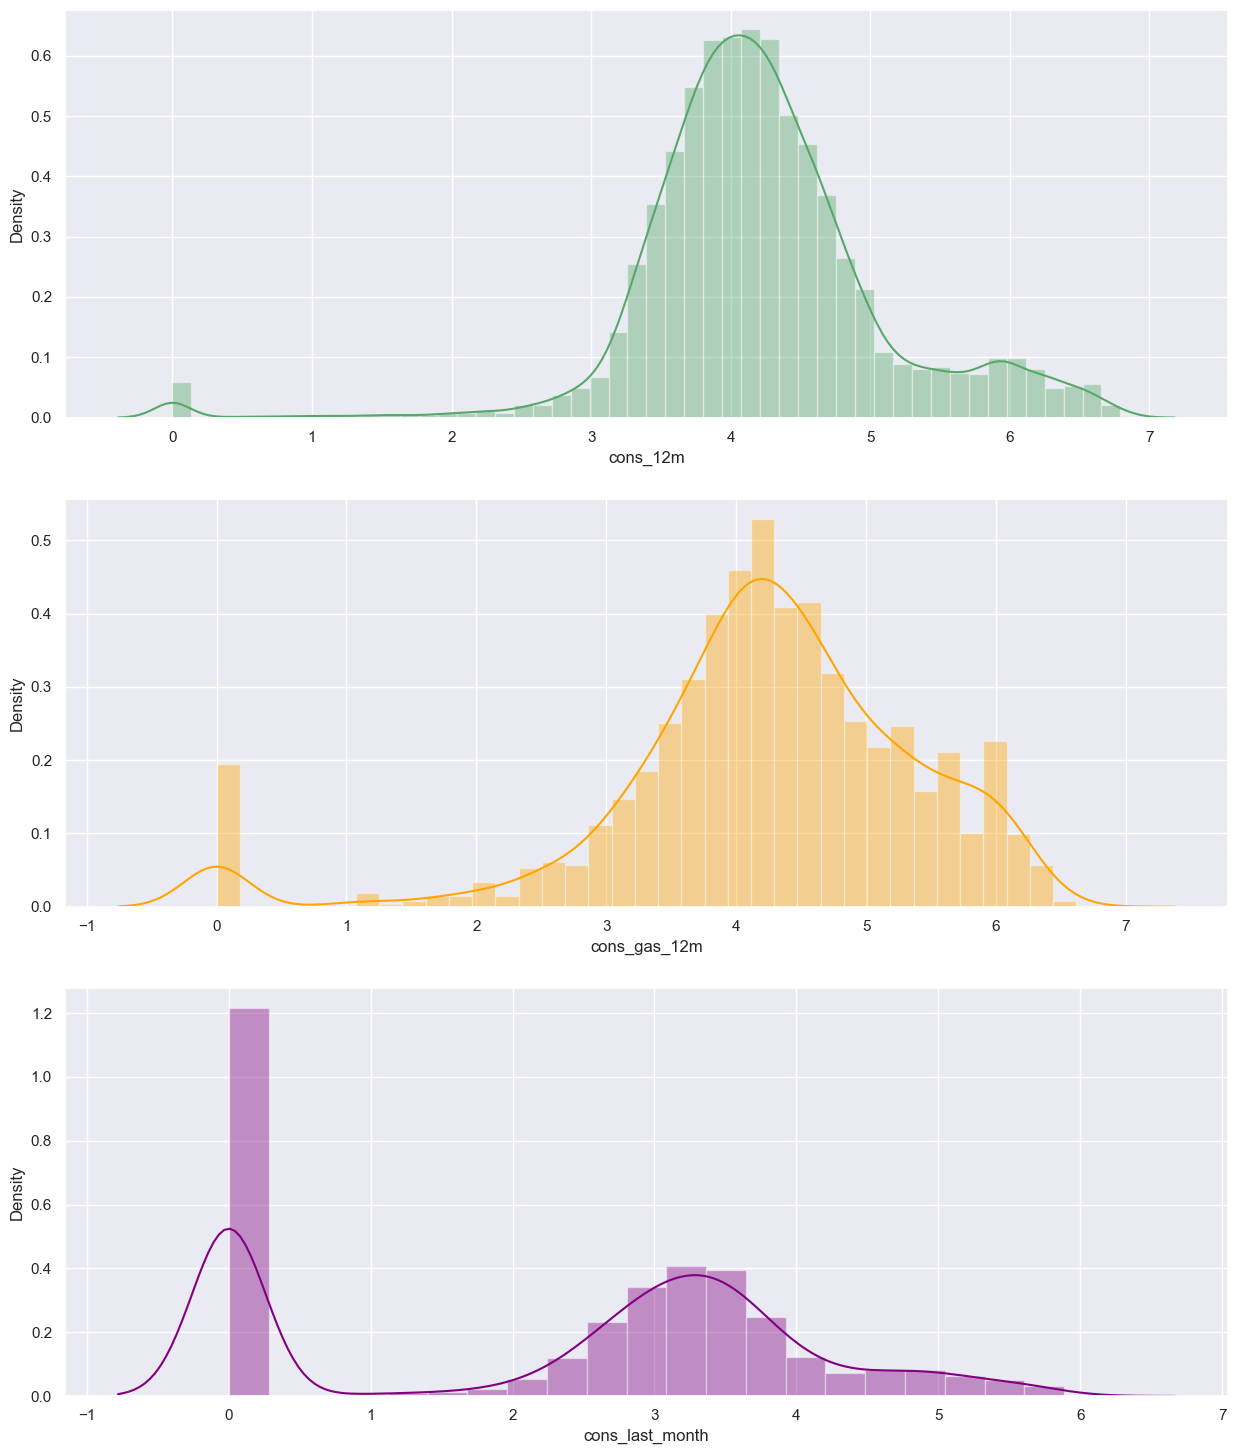

In [32]:
fig, axs = plt.subplots(nrows=3, figsize=(15, 18))
# Plot histograms
sns.distplot((churn_df["cons_12m"].dropna()), ax=axs[0], color='g')
sns.distplot((churn_df[churn_df["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1], color='orange')
sns.distplot((churn_df["cons_last_month"].dropna()), ax=axs[2], color='purple')

plt.show()

### Checking Correlations of Variables
- Understanding feature relationships within a dataset is crucial in revealing linear associations between them. The goal is to identify features strongly correlated with churn, indicating their predictive potential. However, excessively high correlations between features might raise concerns. High correlation suggests shared information, contradicting the assumption of feature independence crucial for parametric predictive models.

- For features to be considered independent, they should show no reliance on one another. When two features exhibit significant correlation and convey similar information, this assumption of independence gets compromised.

- Ideally, a feature set should display zero correlation with other independent variables (all features except the target variable) while demonstrating strong correlation with the target variable (churn). Achieving this ideal scenario is rare; typically, there's a modest degree of correlation among independent features.

- Your task involves assessing the correlation among all features in the model. This analysis will aid in identifying relationships between features and their potential predictive power concerning churn.

In [33]:
correlation = churn_df.corr()

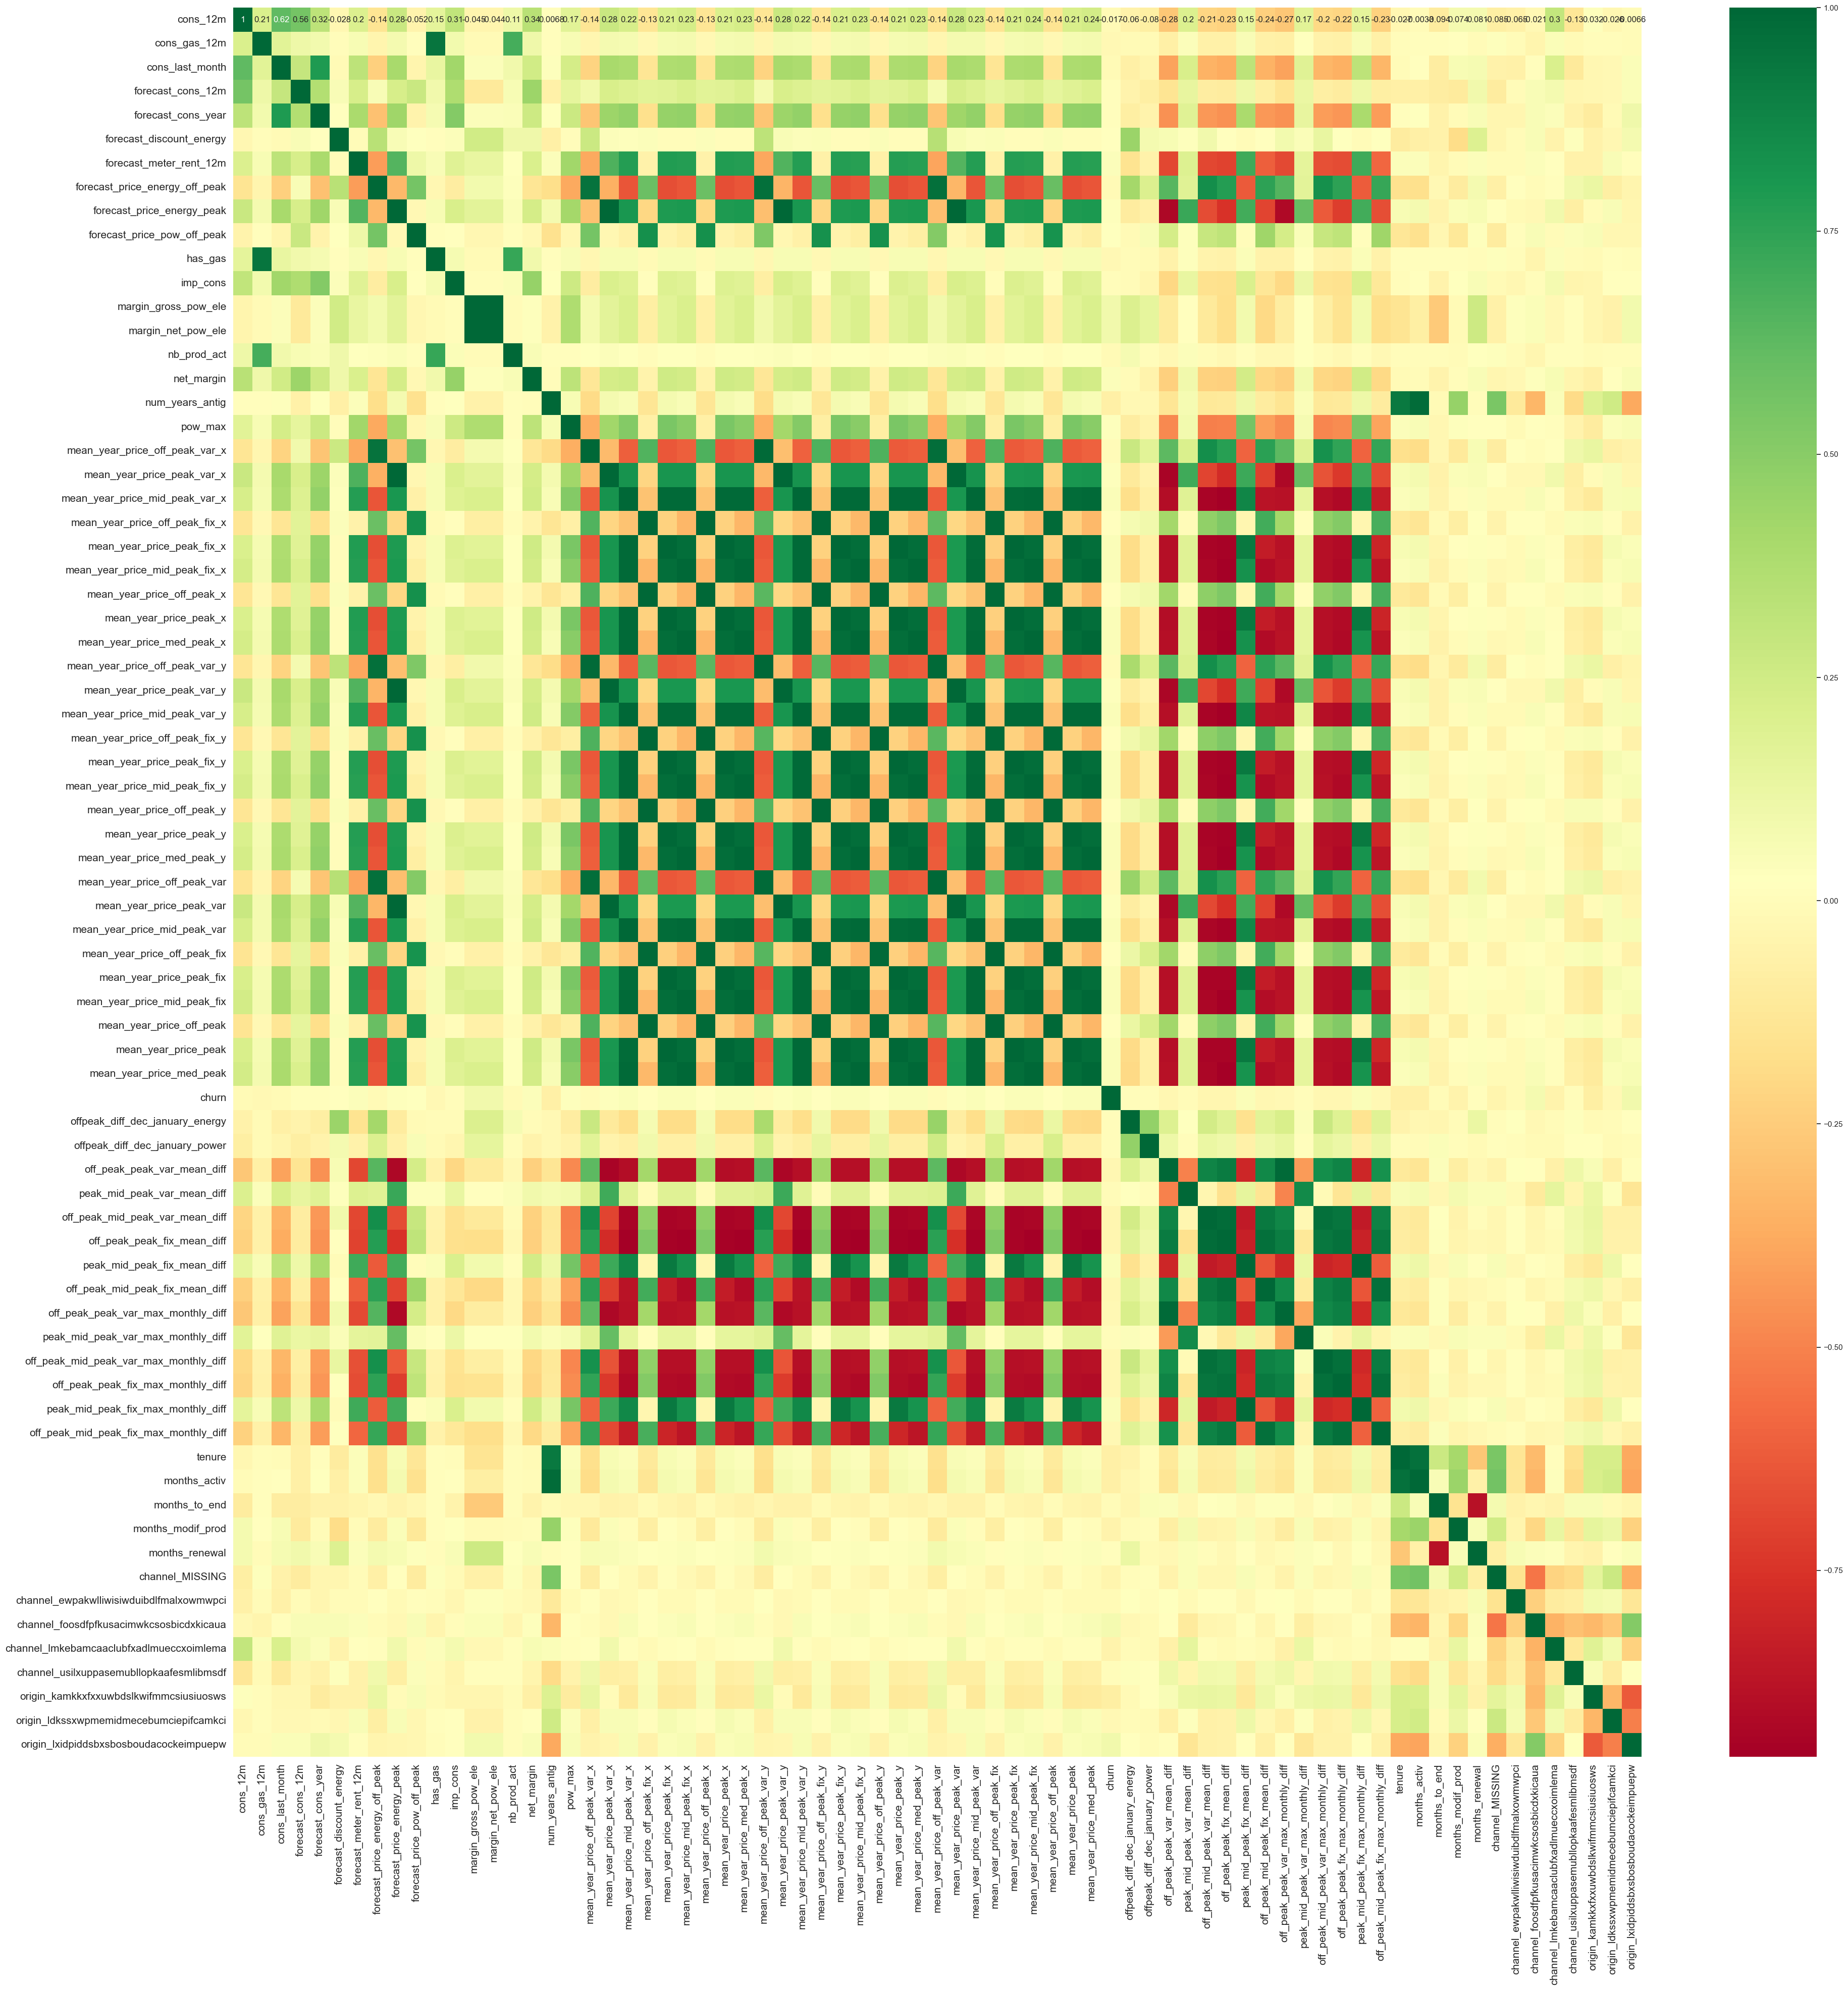

In [34]:
# Correlation Heatmap

plt.figure(figsize=(45, 45))
sns.heatmap(
    correlation, 
    xticklabels=correlation.columns.values,
    yticklabels=correlation.columns.values, 
    annot=True, 
    annot_kws={'size': 12}, 
    cmap='RdYlGn'
)
# Axis ticks size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# View of graph
plt.show()

I will remove two variables(num_years_antig and forecast_cons_year) which exhibit a high correlation with other independent features.

In [35]:
churn_df = churn_df.drop(columns=['num_years_antig', 'forecast_cons_year'])
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14605 entries, 0 to 14604
Data columns (total 72 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   id                                        14605 non-null  object 
 1   cons_12m                                  14605 non-null  float64
 2   cons_gas_12m                              14605 non-null  float64
 3   cons_last_month                           14605 non-null  float64
 4   forecast_cons_12m                         14605 non-null  float64
 5   forecast_discount_energy                  14605 non-null  float64
 6   forecast_meter_rent_12m                   14605 non-null  float64
 7   forecast_price_energy_off_peak            14605 non-null  float64
 8   forecast_price_energy_peak                14605 non-null  float64
 9   forecast_price_pow_off_peak               14605 non-null  float64
 10  has_gas                           

In [36]:
churn_df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_ldkssxwpmemidmecebumciepifcamkci,origin_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.047073,0.040659,1.619163,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.059075,0.000000,1.656207,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.066622,0.036589,1.656207,...,68,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.059448,0.000000,1.656207,...,69,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.048014,0.041399,1.619163,...,71,9,1,0,0,0,0,1,0,0


## Churn Prediction Models

### Models Considered:
1. Logistic Regression
2. Random Forest Classifier
3. Gradient Boosting
4. Support Vector Machine
5. KNN

### Model Selection Strategy:
- **Baseline Model:**
  Start with Logistic Regression as a simple and interpretable baseline to set a benchmark for model performance.
  
- **Tree-Based Models:**
  Explore Random Forest, Gradient Boosting, and XGBoost/LightGBM/CatBoost for capturing non-linearity and interactions well.
  
- **Complex Models:**
  Consider neural networks for capturing intricate patterns if substantial data is available.
  
- **Ensemble Approaches:**
  Build an ensemble model combining the strengths of different algorithms for improved predictive power.

### Model Evaluation Metrics:
1. **Accuracy, Precision, Recall, F1-Score:** Provide insights into model performance in predicting churn.
2. **ROC-AUC (Receiver Operating Characteristic - Area Under the Curve):** Measures the model's ability to distinguish between churn and non-churn instances.
3. **Confusion Matrix:** Provides a detailed breakdown of true positive, true negative, false positive, and false negative predictions.


Split the Data
We need to split the dataset into training dataset and testing dataset. We will use train_test_slit from sklearn package to split the data into 70% for training and hold back 30% for testing.

In [37]:
# Make a copy of our data
train_df = churn_df.copy()

# Separate target variable from independent variables
X = churn_df.drop(columns=['id', 'churn'])
y = churn_df['churn']

In [38]:
X

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_ldkssxwpmemidmecebumciepifcamkci,origin_lxidpiddsbxsbosboudacockeimpuepw
0,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.047073,0.040659,1.619163,1,...,2,6,0,0,1,0,0,0,0,1
1,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.059075,0.000000,1.656207,0,...,76,4,1,0,0,0,0,1,0,0
2,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.066622,0.036589,1.656207,0,...,68,8,0,0,1,0,0,1,0,0
3,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.059448,0.000000,1.656207,0,...,69,9,0,0,0,1,0,1,0,0
4,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.048014,0.041399,1.619163,0,...,71,9,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14600,4.508812,4.680707,0.000000,3.667360,0.0,1.291591,0.056259,0.000000,1.656207,1,...,7,19,0,0,1,0,0,0,0,1
14601,3.858778,0.000000,2.260071,2.801191,0.0,2.161458,0.041459,0.038180,1.778122,0,...,40,4,0,0,1,0,0,0,0,1
14602,3.265996,0.000000,2.255273,2.281919,0.0,2.115943,0.048014,0.041399,1.619163,0,...,46,10,0,0,1,0,0,0,0,1
14603,2.120574,0.000000,0.000000,1.308351,0.0,0.912753,0.059075,0.000000,1.656207,0,...,40,4,0,0,1,0,0,0,0,1


In [39]:
y

0        1
1        0
2        0
3        0
4        0
        ..
14600    0
14601    1
14602    1
14603    0
14604    0
Name: churn, Length: 14605, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split
# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

Training cases: 10223
Test cases: 4382


In [41]:
y.value_counts()

0    13186
1     1419
Name: churn, dtype: int64

We can see that the number of churn and not churn is imbalanced. Here we will use imblearn’s SMOTE or Synthetic Minority Oversampling Technique to solve the this problem

In [42]:
pip install --upgrade scikit-learn imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [43]:
from imblearn.over_sampling import SMOTE
X, y = SMOTE().fit_resample(X, y)

In [44]:
#check the number of target variable after oversampling using SMOTE
from collections import Counter
print('Resample dataset shape', Counter(y))

Resample dataset shape Counter({1: 13186, 0: 13186})


Resample dataset shape Counter({1: 13186, 0: 13186})
It can be seen that the distrubtion of Churn status are now balanced

In [45]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10223, 70)
(10223,)
(4382, 70)
(4382,)


## Logistic Regression

In [46]:
# Train the model
from sklearn.linear_model import LogisticRegression

# Set regularization rate
reg = 0.01

# train a logistic regression model on the training set
model = LogisticRegression(C=1/reg, solver="liblinear").fit(X_train, y_train)
print (model)

LogisticRegression(C=100.0, solver='liblinear')


In [47]:
y_pred = model.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [48]:
#Let's check the accuracy of the predictions 
from sklearn.metrics import accuracy_score

print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.9091738931994523


Text(110.44999999999997, 0.5, 'Actual')

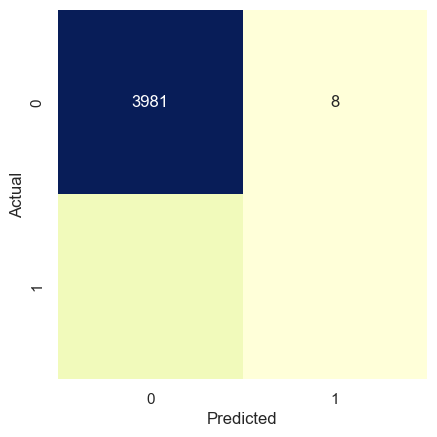

In [49]:
#create confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred) 
sns.heatmap(cm, square=True, annot=True, cbar=False,  cmap="YlGnBu" ,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [50]:
from sklearn import metrics
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

True positives: 3
False positives: 8
True negatives: 3981
False negatives: 390



In [51]:
from sklearn. metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      3989
           1       0.27      0.01      0.01       393

    accuracy                           0.91      4382
   macro avg       0.59      0.50      0.48      4382
weighted avg       0.85      0.91      0.87      4382



Interpretation:
- For class 0 (churn = 0), the model performs well with high precision, recall, and F1-score, indicating strong predictive performance.
- For class 1, the model has very low recall (only correctly identifying 1% of actual positives), which significantly impacts precision and F1-score.
- The overall accuracy is relatively high (91%), but due to imbalanced classes, accuracy might not be the most informative metric.
- The macro-average and weighted-average metrics provide an overall picture considering both classes, showing the weighted average performs better, given the class imbalance.
- Given the imbalance, it might be essential to consider other metrics like precision-recall curves, ROC-AUC, or focus on class-specific evaluation to better understand the model's performance, especially regarding its ability to identify the minority class (class 1).

In [52]:
# retrieve the precision_score and recall_score metrics
from sklearn.metrics import precision_score, recall_score

print("Overall Precision:",precision_score(y_test, y_pred))
print("Overall Recall:",recall_score(y_test, y_pred))

Overall Precision: 0.2727272727272727
Overall Recall: 0.007633587786259542


- These overall metrics are likely calculated by aggregating the precision and recall values across multiple classes or predictions. It appears that the model's performance, when averaged across all classes or predictions, yields a low recall of approximately 0.76% and a precision of 27%.

- However, in scenarios with class imbalance or when considering multiple classes, such aggregated metrics might not accurately represent the model's performance. It's often beneficial to examine class-specific metrics or use weighted averages, especially when dealing with imbalanced datasets, to get a more informative evaluation of the model's behavior across different classes.

Until now, we've considered the predictions from the model as being either 1 or 0 class labels. Actually, things are a little more complex than that. Statistical machine learning algorithms, like logistic regression, are based on probability; so what actually gets predicted by a binary classifier is the probability that the label is true (P(y)) and the probability that the label is false (1 - P(y)). A threshold value of 0.5 is used to decide whether the predicted label is a 1 (P(y) > 0.5) or a 0 (P(y) <= 0.5). You can use the predict_proba method to see the probability pairs for each case:

In [53]:
y_scores = model.predict_proba(X_test)
print(y_scores[:10])

[[0.85913004 0.14086996]
 [0.92914436 0.07085564]
 [0.91698422 0.08301578]
 [0.92449358 0.07550642]
 [0.75759449 0.24240551]
 [0.87946531 0.12053469]
 [0.93879859 0.06120141]
 [0.93877986 0.06122014]
 [0.91984065 0.08015935]
 [0.88877531 0.11122469]]


The decision to score a prediction as a 1 or a 0 depends on the threshold to which the predicted probabilities are compared. If we were to change the threshold, it would affect the predictions; and therefore change the metrics in the confusion matrix. A common way to evaluate a classifier is to examine the true positive rate (which is another name for recall) and the false positive rate for a range of possible thresholds. These rates are then plotted against all possible thresholds to form a chart known as a received operator characteristic (ROC) chart, like this:

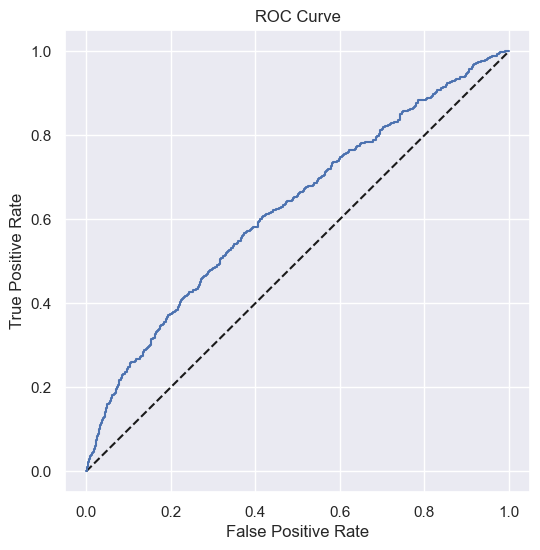

In [54]:
from sklearn.metrics import roc_curve
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

The ROC chart shows the curve of the true and false positive rates for different threshold values between 0 and 1. A perfect classifier would have a curve that goes straight up the left side and straight across the top. The diagonal line across the chart represents the probability of predicting correctly with a 50/50 random prediction; so you obviously want the curve to be higher than that (or your model is no better than simply guessing!).

The area under the curve (AUC) is a value between 0 and 1 that quantifies the overall performance of the model. The closer to 1 this value is, the better the model. Once again, scikit-Learn includes a function to calculate this metric.

In [55]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

AUC: 0.6256792693903145


- Looking at the true negatives, we have 3981 out of 3989. This means that out of all the negative cases (churn = 0), we predicted 3981 as negative (hence the name True negative). This is great!

- Looking at the false negatives, this is where we have predicted a client to not churn (churn = 0) when in fact they did churn (churn = 1). This number is too high at 390, but we want to get the false negatives to as close to 0 as we can.

- Looking at false positives, this is where we have predicted a client to churn when they actually didnt churn. For this value we can see there are 8, quite good.

- With the true positives, we can see that in total we have 393 clients that churned in the test dataset. However, we are only able to correctly identify 3 of those 393, which is very poor.

- Looking at the accuracy score, this is very misleading! Hence the use of precision and recall is important. The accuracy score is high, but it does not tell us the whole story.

- Looking at the precision score and recall score, this shows us a score of 0.27 and 0.02 which are very bad. This is not a good model.

###### AS we have seen logistic regression dosnot fit properly so, we move on next algorithm i.e, Random Forest

## Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier

model_RF = RandomForestClassifier(n_estimators = 1000).fit(X_train, (y_train))
print (model_RF)

RandomForestClassifier(n_estimators=1000)


True positives: 20
False positives: 10
True negatives: 3979
False negatives: 373

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      3989
           1       0.67      0.05      0.09       393

    accuracy                           0.91      4382
   macro avg       0.79      0.52      0.52      4382
weighted avg       0.89      0.91      0.88      4382

Accuracy: 0.9125969876768599
Overall Precision: 0.6666666666666666
Overall Recall: 0.05089058524173028

AUC: 0.6852553172624207


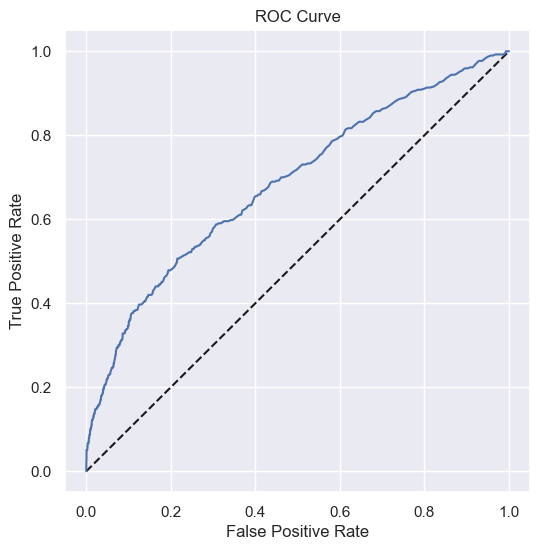

In [57]:
y_pred_RF = model_RF.predict(X_test)
y_scores_RF = model_RF.predict_proba(X_test)

tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred_RF).ravel()
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

print(classification_report(y_test, y_pred_RF))

print('Accuracy:', accuracy_score(y_test, y_pred_RF))
print("Overall Precision:",precision_score(y_test, y_pred_RF))
print("Overall Recall:",recall_score(y_test, y_pred_RF))
auc = roc_auc_score(y_test,y_scores_RF[:,1])
print('\nAUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores_RF[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

- Looking at the true negatives, we have 3984 out of 3989. This is great!

- Looking at the false negatives, 371 is too high but better than Logistic Model.

- Looking at false positives, we can see there are only , quite good.

- With the true positives, we correctly identify 22 of those 393, which is very poor.

- Looking at the accuracy score, this is very misleading, looking at the precision score and recall score, this shows us a score of 0.81 which is not bad, but could be improved. However, the recall shows us that the classifier has a very poor ability to identify positive samples. This would be the main concern for improving this model!

- The AUC is better a little bit comparing with Logistic Regression.

In [58]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': model_RF.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()

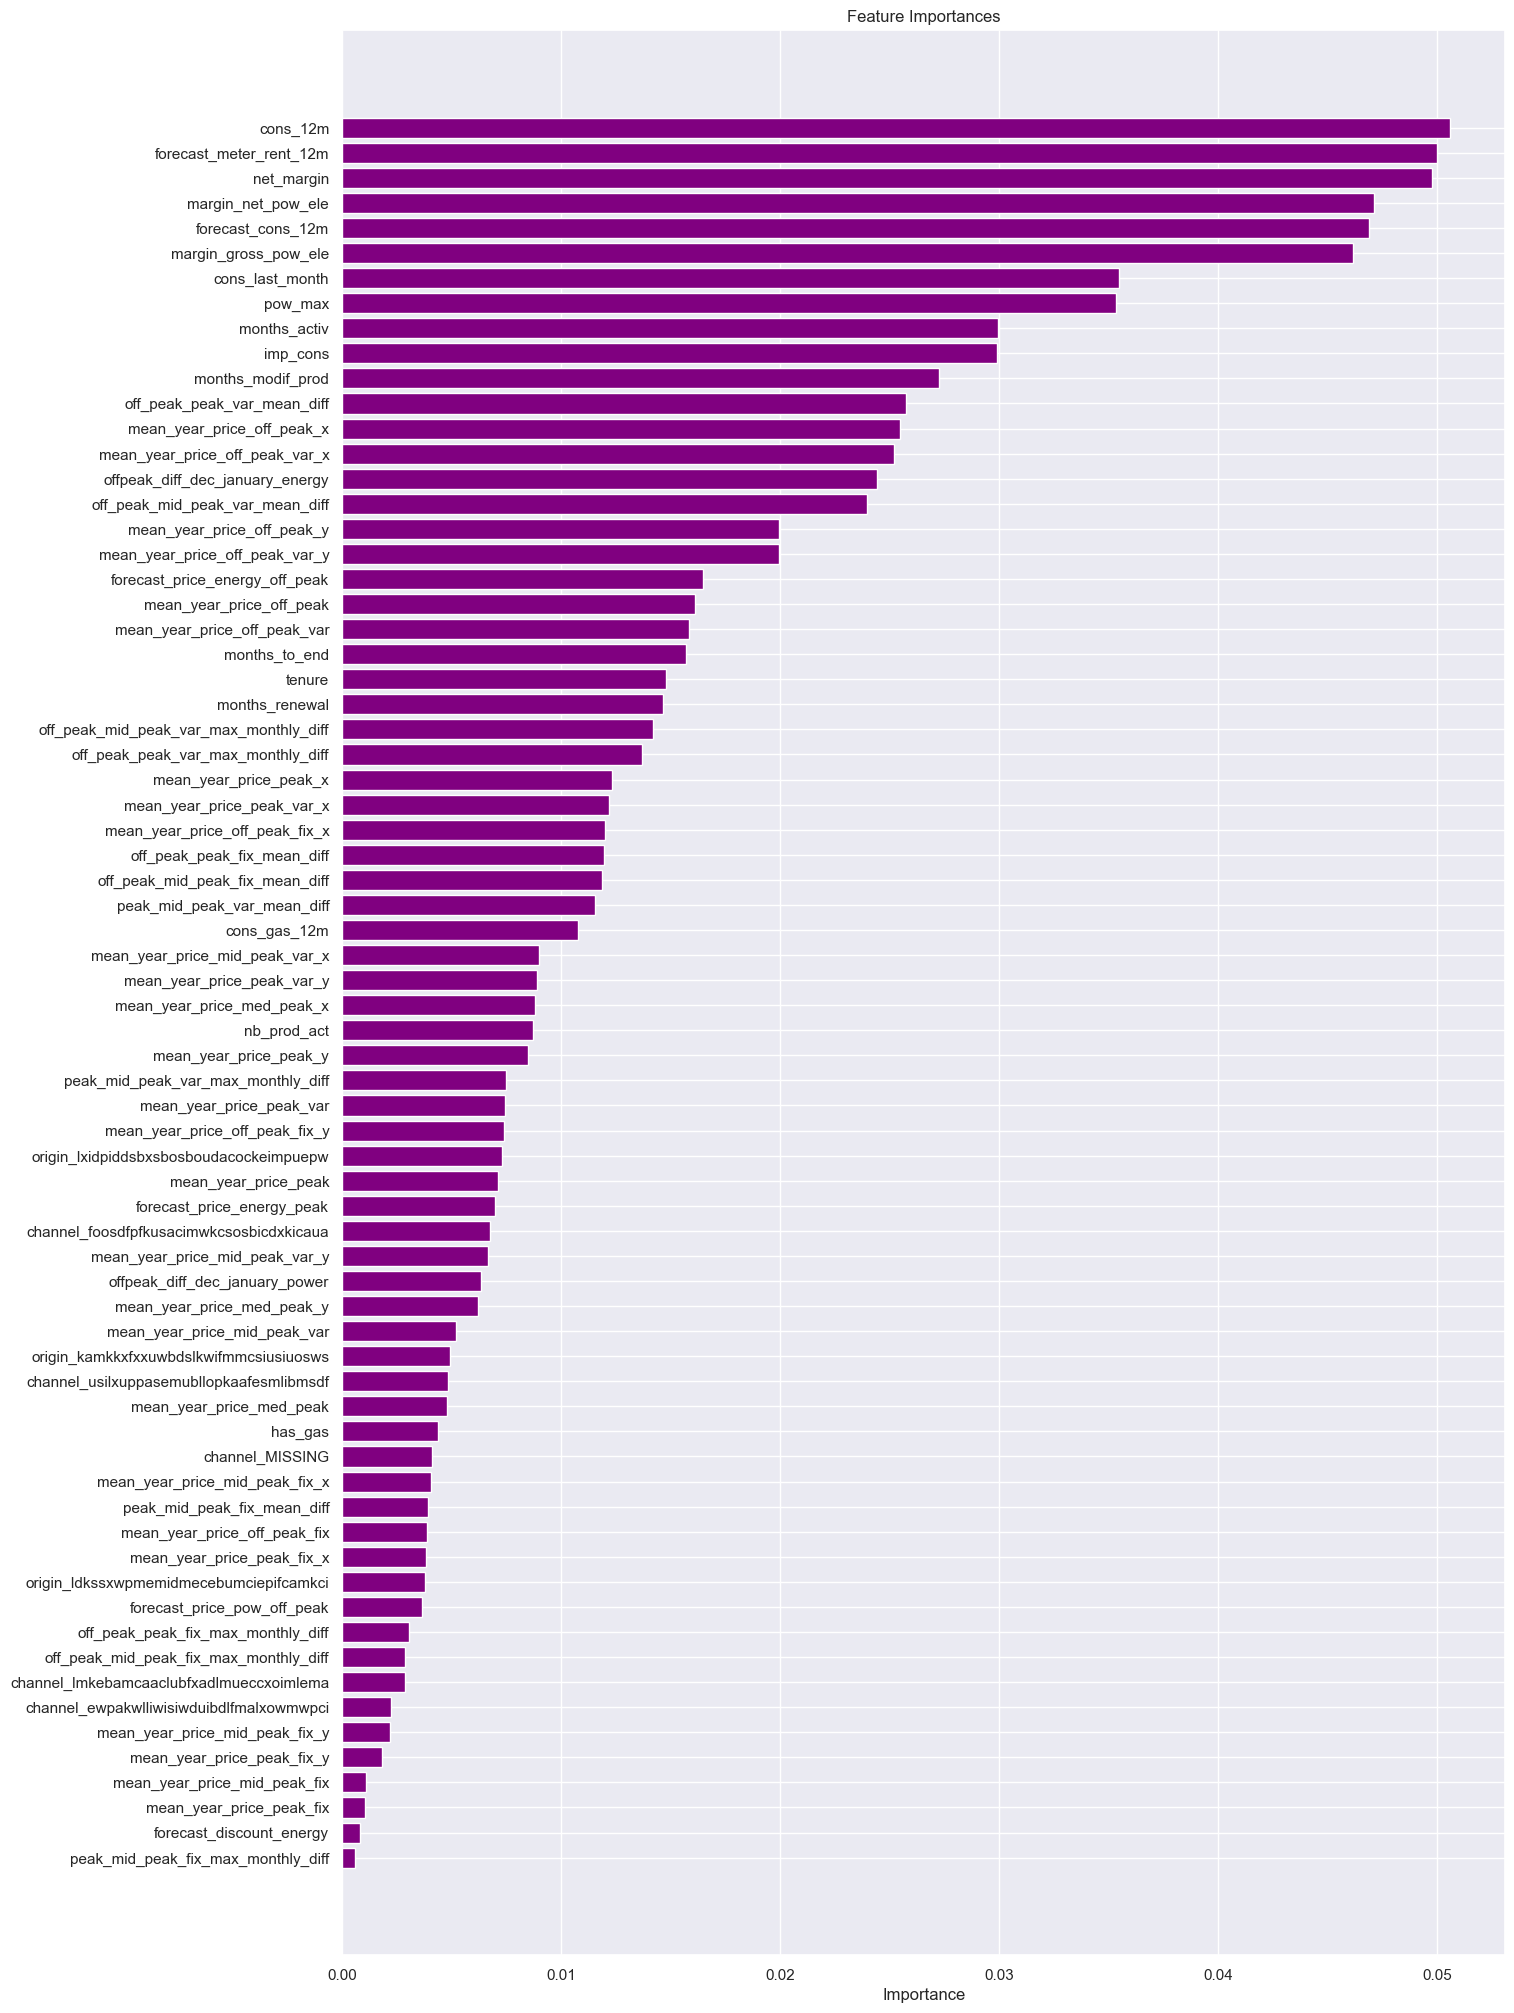

In [59]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='purple', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

From this chart, we can observe the following points:

- Forecast_meter_rent,Net margin and consumption over 12 months is a top driver for churn in this model
- Margin on power subscription also is an influential driver
- Time seems to be an influential factor, especially the number of months they have been active, their tenure and the number of months since they updated their contract
- The feature that our colleague recommended is in the top half in terms of how influential it is and some of the features built off the back of this actually outperform it
- Our price sensitivity features are scattered around but are not the main driver for a customer churning
- The last observation is important because this relates back to our original hypothesis:

> Is churn driven by the customers' price sensitivity?

- Based on the output of the feature importances, it is not a main driver but it is a weak contributor. However, to arrive at a conclusive result, more experimentation is needed.

In [60]:
X_test = X_test.reset_index()
X_test.drop(columns='index', inplace=True)

In [61]:
y_scores = model_RF.predict_proba(X_test)
probabilities = y_scores[:, 1]

In [62]:
X_test['churn'] = y_pred_RF.tolist()
X_test['churn_probability'] = probabilities.tolist()
X_test.to_csv('data_with_predictions.csv')

Now let's save our trained model so we can use it again later.

In [63]:
import joblib

# Save the model as a pickle file
filename = 'powerco_churn_model.pkl'
joblib.dump(model_RF, filename)

['powerco_churn_model.pkl']

## Business impact of discount
- We conduct a brief analysis on the discount strategy proposed. This is just 1 way to solve it, there may be many other ways!

- The SME division head proposed that we give a 20% discount to high propensity to churn customers. We can assume to start that everyone who is offered a discount will accept it.

## Workflow
- Our task is to calculate the forecast revenue for the set of customers:

- When no discount is offered
- And when a discount is offered based on a probability cutoff to decide who should receive the 20% discount
- And hence to decide where the cut-off should be set in order to maximise revenue

In [64]:
test_data = pd.read_csv('data_with_predictions.csv')
test_data.drop(test_data.columns[0], axis=1, inplace=True)
test_data.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,...,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_ldkssxwpmemidmecebumciepifcamkci,origin_lxidpiddsbxsbosboudacockeimpuepw,churn,churn_probability
0,4.297476,3.606166,3.147676,3.310519,0.0,2.123002,0.047796,0.041392,1.619163,1,...,0,0,1,0,0,0,0,1,0,0.104
1,3.811843,0.000000,2.649335,2.803362,0.0,2.124960,0.047367,0.041441,1.622618,0,...,1,0,0,0,0,1,0,0,0,0.014
2,6.390862,5.735624,5.537833,3.190099,0.0,2.123067,0.048018,0.041618,1.619163,1,...,1,0,0,0,0,1,0,0,0,0.013
3,3.827757,0.000000,0.000000,3.002373,0.0,1.312389,0.058768,0.000000,1.656207,0,...,0,0,1,0,0,0,1,0,0,0.033
4,5.286827,0.000000,4.155700,2.436481,0.0,2.116342,0.047862,0.041944,1.624336,0,...,0,0,1,0,0,0,0,1,0,0.266


## Calculating a baseline revenue estimate (no intervention)
- Calculate a baseline estimate of the electricity revenue for every customer for the next twelve months based on the forecast consumption and forecast price and actual churn outcome. Call this basecase_revenue.

- For customers who end up churning, we should reduce our forecast revenue calculation by 91.9% to account for the customers churn some time between January 2016 and the start of March 2016. (Not knowing when they churn, a reasonable assumption for the lost revenue is the average of 100%, corresponding to churn on 1 January 2016, and 83.9%, corresponding to churn at the end of February, or 59 days into a 365 day year). Call this new variable basecase_revenue_after_churn, ie basecase_revenue_after_churn = basecase_revenue(1 -0.919 churn)

In [65]:
# Electricity revenue for each customer consists of energy consumption (amount * price) and the meter rent
# (the power price may also play a role, but we will ignore it for now since we need to ask the client for more data)
# Note that we need to reverse the log10-transformation from the data cleaning step

test_data['basecase_revenue'] = (np.power(10, test_data['forecast_cons_12m']) + 1) * test_data['forecast_price_energy_off_peak'] + test_data['forecast_meter_rent_12m']

# Taking churn into account
test_data['basecase_revenue_after_churn'] = test_data['basecase_revenue'] * (1 - 0.919 * test_data['churn'])

In [66]:
test_data.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,...,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_ldkssxwpmemidmecebumciepifcamkci,origin_lxidpiddsbxsbosboudacockeimpuepw,churn,churn_probability,basecase_revenue,basecase_revenue_after_churn
0,4.297476,3.606166,3.147676,3.310519,0.0,2.123002,0.047796,0.041392,1.619163,1,...,1,0,0,0,0,1,0,0.104,99.875420,99.875420
1,3.811843,0.000000,2.649335,2.803362,0.0,2.124960,0.047367,0.041441,1.622618,0,...,0,0,0,1,0,0,0,0.014,32.291216,32.291216
2,6.390862,5.735624,5.537833,3.190099,0.0,2.123067,0.048018,0.041618,1.619163,1,...,0,0,0,1,0,0,0,0.013,76.559408,76.559408
3,3.827757,0.000000,0.000000,3.002373,0.0,1.312389,0.058768,0.000000,1.656207,0,...,1,0,0,0,1,0,0,0.033,60.461522,60.461522
4,5.286827,0.000000,4.155700,2.436481,0.0,2.116342,0.047862,0.041944,1.624336,0,...,1,0,0,0,0,1,0,0.266,15.240165,15.240165


## Calculate the estimated benefits and costs of intervention
Now, pick a cut-off probability (eg 0.5) so that:

* Customers with a higher churn probability than the cut-off get a discount, and
* Customers below the churn-probability do not get a discount.

From this, calculate the revenue of the intervention scenario assuming:

* All customers who are offered a discount accept it
* Customers who do receive a discount are are assumed not to churn in the next twelve months (ie churn probability = 0), and therefore the retained
revenue is 0.8basecase_revenue , being (1-discount_fraction)basecase_revenue

* Customers who do not receive a discount are assumed to churn based on the observed dependent variable (ie, a 1 or 0 for whether they actually churned or not).

Now, map out the revenue delta as a function of the cut-off probability in a graph. What cut-off probability approximately optimises the revenue outcome? Assume for these calculations that the customer does not consume more or less electricity because the price changes. In practice, we would expect that if the customer's cost goes down then their consumption might increase. We will see two counterbalancing effects at play:

- For true positives we will see revenue retention vs the no-discount scenario
- For false positives we will see reduced revenue from giving them a discount when they wouldn't in fact churn.
(False negatives represent an opportunity cost but not an actual cost difference between the two scenarios.)

The optimal cut-off point will balance the benefits from true positives against the costs of false positives. Our task is to approximately find the optimal cut-off point. We may need to make additional assumptions. If we feel the assumptions above aren't justified and that others are better then we should modify our assumptions.

In [67]:
def get_rev_delta(pred: pd.DataFrame, cutoff: float=0.5, discount: float=0.2) -> float:
    """
    Get the delta of revenues for offering discount for all customers with predicted churn risk >= cutoff
    """
    pred['discount_revenue'] = pred['basecase_revenue_after_churn']
    # Churn predicted => discount is given => customer stays for full year, independent of whether the prediction
    # (false positive, "free"/unnecessary discount given) or correct
    pred.loc[pred['churn_probability'] >= cutoff, 'discount_revenue'] = pred['basecase_revenue'] * (1 - discount)
    # Save the revenue delta for each customer in a separate column
    pred['revenue_delta'] = pred['discount_revenue'] - pred['basecase_revenue_after_churn']
    return pred['revenue_delta'].sum()

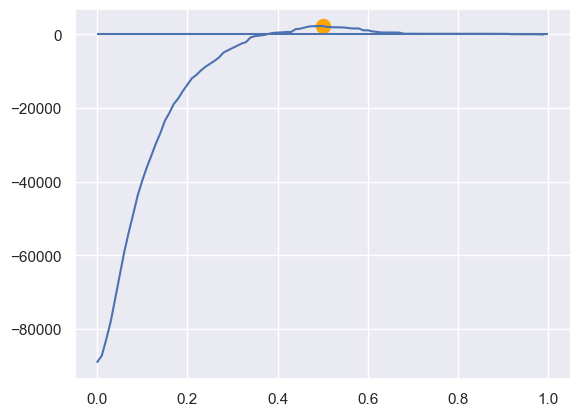

Maximum benefit at cutoff 0.5 with revenue delta of $2,296.55


In [68]:
# Generate a list of possible cutoffs and the corresponding overall revenue deltas
rev_deltas = pd.Series({cutoff: get_rev_delta(test_data, cutoff=cutoff) for cutoff in np.arange(0, 1, 0.01)})

def plot_tradeoff(rev_deltas: pd.Series):
    # Plot the revenue deltas
    rev_deltas.plot()
    # Mark optimal point
    max_pred = rev_deltas.idxmax()
    plt.scatter(max_pred, rev_deltas.loc[max_pred], s=100, c='orange')
    # Reference line for break-even
    plt.hlines(0, 0, 1)
    plt.show()
    print(f'Maximum benefit at cutoff {max_pred} with revenue delta of ${rev_deltas.loc[max_pred]:,.2f}')

plot_tradeoff(rev_deltas)

## Optional extra: how to select the cut-off?
Above, we decided who to offer the discount to based on a probability cut-off. Is this the optimal strategy?

- For instance, we might be offering discounts to customers who are not very profitable, thus worsening our overall margins substantially. For example, if offering a discount makes the customer unprofitable on a net margin basis then we might want to let them churn rather than save them.
- Even if we only consider revenue, this strategy might not be optimal from a revenue viewpoint. For instance, we can calculate the expected revenue impact of our strategy and prioritise customers for discounts that have a high expected revenue impact. (This means that the probability of churn might be high but they also might be valuable customers).

A general principle here is that we can afford to spend more on retaining high-value customers because the costs of losing them are higher. A very common mistake in business applications of churn is to focus on the churn probability whilst forgetting the value impact (to greater or lesser extents). We have seen many cases where our clients spend as much effort on retaining unprofitable customers as they do on retaining highly profitable customers.

In [69]:
def get_rev_delta_high_value(pred: pd.DataFrame, cutoff: float=0.5, discount: float=0.2, min_rev: float=500):
    """
    Get the delta of revenues for offering discount for all customers with predicted churn risk >= cutoff and rev
    """
    pred['discount_revenue'] = pred['basecase_revenue_after_churn']
    # Churn predicted => discount is given for high-value customers => customer stays for full year, independent
    # (false positive, "free"/unnecessary discount given) or correct
    pred.loc[(pred['churn_probability'] >= cutoff) & (pred['basecase_revenue'] > min_rev),
    'discount_revenue'] = pred['basecase_revenue'] * (1 - discount)
    # Save the revenue delta for each customer in a separate column
    pred['revenue_delta'] = pred['discount_revenue'] - pred['basecase_revenue_after_churn']
    return pred['revenue_delta'].sum()

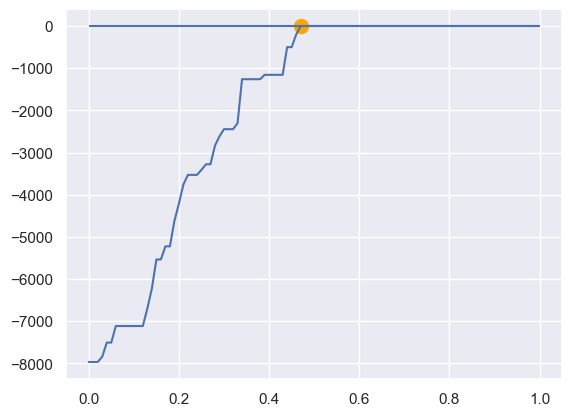

Maximum benefit at cutoff 0.47000000000000003 with revenue delta of $0.00


In [70]:
## Generate a list of possible cutoffs and the corresponding overall revenue deltas
rev_deltas_high_value = pd.Series({cutoff: get_rev_delta_high_value(test_data, cutoff=cutoff) for cutoff in np.arange(0, 1, 0.01)})
# Generate a list of possible cutoffs and the corresponding overall revenue deltas
plot_tradeoff(rev_deltas_high_value)

## Note:

- In this case, it doesn't make sense to prioritize large-revenue customers, since the overall revenue delta is much lower than when targeting everyone. However, this is only the case here since the intervention doesn't depend on the number of customers (simply adjusting prices). The interventions usually go beyond simply adjusting prices to prevent churn.
- There may be the option of intensifying the customer relation, adding key account managers, or other interventions that do incur costs depending on how many customers are targeted. In that case, it may be benefitial to target only a subset of customers to save on these costs, even if the delta in the figure above is reduced.

## Optional extra: Using forecast rather than actual churn
We may have noticed above that we used actual churn outcomes in calculating the financial impact. Actual churn outcomes are fine if we know them and are conducting a retrospective analysis of the effectiveness of a strategy. This example of analysis is commonly known as "backtesting", ie seeing how well a strategy would have performed historically.

Of course, one must be careful that any analysis is done using out-of-sample data. Conducting the analysis on the training data will lead to predictions that are too optimistic.

In practice, actual outcomes may not be available because they are in the future. An alternative is to optimise predicted/forecast revenue based on the probabilities which are an output from our churn model. In this case, we would replace the actual churn outcomes (churn) with the predicted probability of churn from our model. The results here are obviously model-dependent.

If our model probabilities are poorly calibrated then we can end up with quite poor results from this. Going down this path therefore usually requires the extra step of checking how well calibrated the model probabilities are, and potentially correcting for any miscalibration using Platt scaling, sigmoid calibration or isotonic regression.

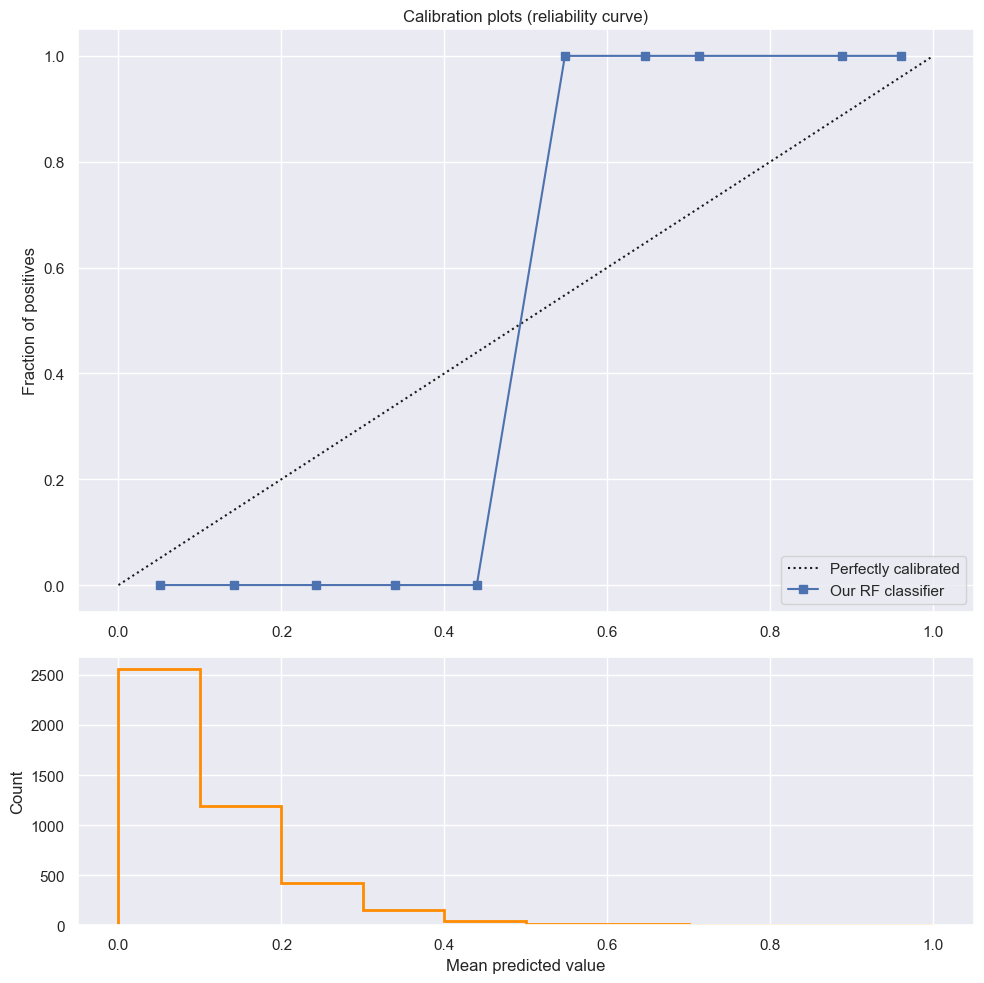

In [71]:
# Check our calibration

from sklearn.calibration import calibration_curve

fig = plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
fraction_of_positives, mean_predicted_value = calibration_curve(
    y_true=test_data['churn'],
    y_prob=test_data['churn_probability'],
    n_bins=10
)
ax1.plot(mean_predicted_value, fraction_of_positives, "s-", label="Our RF classifier")
ax2.hist(test_data['churn_probability'], range=(0, 1), bins=10, color='darkorange', histtype="step", lw=2)
ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots (reliability curve)')
ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
plt.tight_layout()

This chart tells us a few things:
- The top calibration curve exhibits a sigmoid curve, which is typical for an under-confident classifier.
- The bottom chart shows us that the model is postively skewed toward predicting a probability, perhaps due to having such low confidence.

In [72]:
# Electricity evenue for each customer consists of energy consumption (amount * price) and the meter rent
# (the power price may also play a role, but we will ignore it for now since we need to ask the client for more d
# Note that we need to reverse the log10-transformation from the data cleaning step

test_data['basecase_revenue'] = np.power(10, test_data['forecast_cons_12m']) * test_data['forecast_price_energy_off_peak'] + test_data['forecast_meter_rent_12m']
# Taking churn into account
test_data['basecase_revenue_after_churn'] = test_data['basecase_revenue'] * (1 - 0.919 * test_data['churn_probability'])

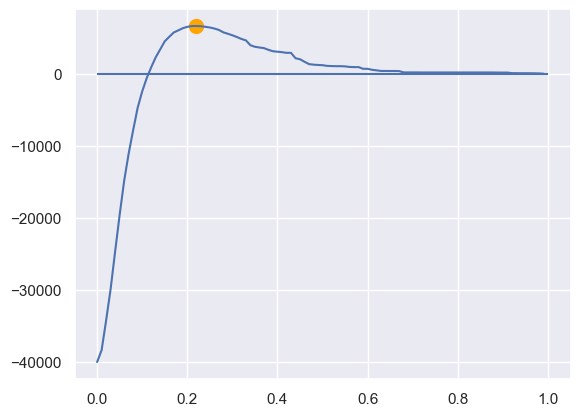

Maximum benefit at cutoff 0.22 with revenue delta of $6,614.33


In [73]:
# Generate a list of possible cutoffs and the corresponding overall revenue deltas
rev_deltas = pd.Series({cutoff: get_rev_delta(test_data, cutoff=cutoff) for cutoff in np.arange(0, 1, 0.01)})
plot_tradeoff(rev_deltas)

                                                 •♦•♦•♦•